Nguyen Trong Minh 22BI13304

#### Exercise 1

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
df1 = pd.read_csv("Data_EX1.txt", header=None)
df1 = df1.drop(df1.columns[0], axis=1)
df1.head()

,1,2,3,4,5,6,7,8,9,10,11,12
0,15.0,18.0,17.5,18.5,22.9,27.0,26.0,26.8,26.5,23.6,23.6,16.8
1,14.3,17.6,16.9,19.1,22.0,28.3,27.5,26.4,24.3,24.3,21.3,18.5
2,13.2,18.1,18.5,20.5,21.8,25.4,26.5,28.1,25.9,23.9,20.0,16.9
3,15.4,19.8,20.9,21.8,21.5,25.8,26.1,27.3,25.6,24.1,18.2,18.4
4,18.0,17.5,16.1,18.9,22.7,25.6,25.2,28.1,26.6,24.1,15.9,15.2


In [3]:
for i in range(1,13):
    df1[i] = pd.to_numeric(df1[i], errors='coerce')
    df1[i] = df1[i].replace(30.0, np.nan)
    
days_ = df1.T.values.flatten().tolist()
days = [num for num in days_ if num != -99.0]
for i in range(1,13):
    df1[i] = df1[i].replace(-99.0, np.nan)

In [19]:
time_range = range(df1.shape[1])
months = ["01\nJan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov","Dec","31\nDec"]

# mean of each month
month_mean = [np.nanmean(df1[x].to_numpy()) for x in range(1,13)]
# text position
text_y = [x + 3 for x in month_mean]
text_y[5] -= 1
# range of each month
month_min = [np.nanmin(df1[x]) for x in range(1,13)]
month_max = [np.nanmax(df1[x]) for x in range(1,13)]



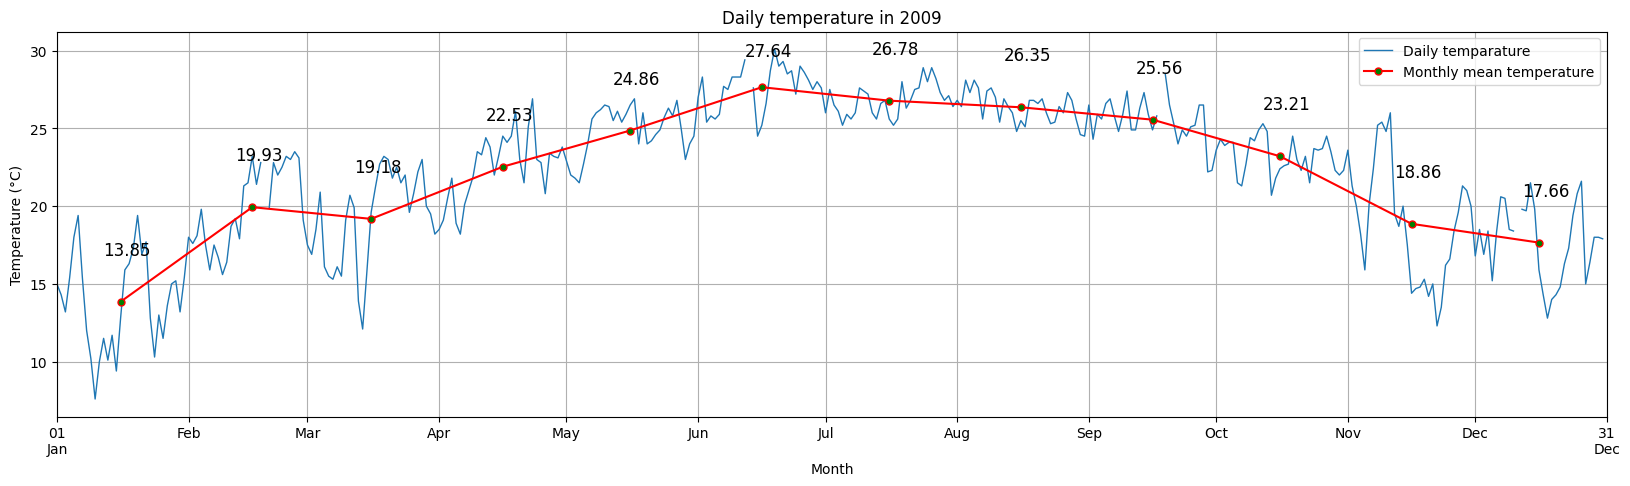

In [20]:
# plot
plt.figure(figsize=(20,5))

day_range = range(365)
month__ = [0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334, 365]
month_ = [x + 15 for x in month__[:-1]]
plt.plot(day_range, days, linewidth=1, label='Daily temparature')
#middle line
plt.plot(month_,month_mean, marker='.', markersize=10,markerfacecolor='green', linestyle='solid', color="red", label="Monthly mean temperature")
# plt.scatter(time_range, month_mean, color='green', label='dots', zorder=3)

# Add text labels next to the points
for i in range(len(time_range)):
    plt.text(month_[i] - 4, text_y[i], str(np.round(month_mean[i],2)), fontsize=12)


# other 
plt.legend()
plt.xticks(month__, months)
plt.xlim(0,365)
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.title("Daily temperature in 2009")
plt.grid()

#### Exercise 2

Text(0.5, 1.0, 'Daily Temperature Heatmap in 2009')

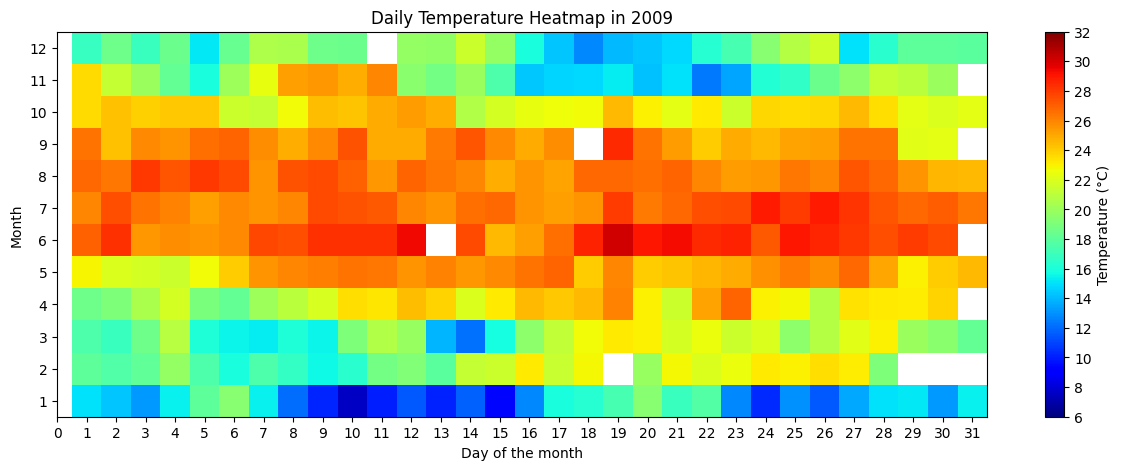

In [23]:
x_axis = np.arange(1,32,1)
y_axis = np.arange(1,13,1)
data = df1.T
x_axis, y_axis = np.meshgrid(x_axis, y_axis)

plt.figure(figsize=(15,5))
cm = plt.pcolormesh(x_axis, y_axis, data, cmap = 'jet', vmin=6, vmax=32)      #this is the pcolormesh

plt.xticks(range(32),range(32))
plt.yticks(range(12,0,-1))

cbar = plt.colorbar(cm)
cbar.set_label('Temperature (°C)')
cbar.set_ticks(range(6,33,2))  # Positions of ticks
cbar.set_ticklabels(range(6,33,2))

plt.ylabel("Month")
plt.xlabel("Day of the month")
plt.title("Daily Temperature Heatmap in 2009")

#### Exercise 3

<Figure size 1500x500 with 0 Axes>

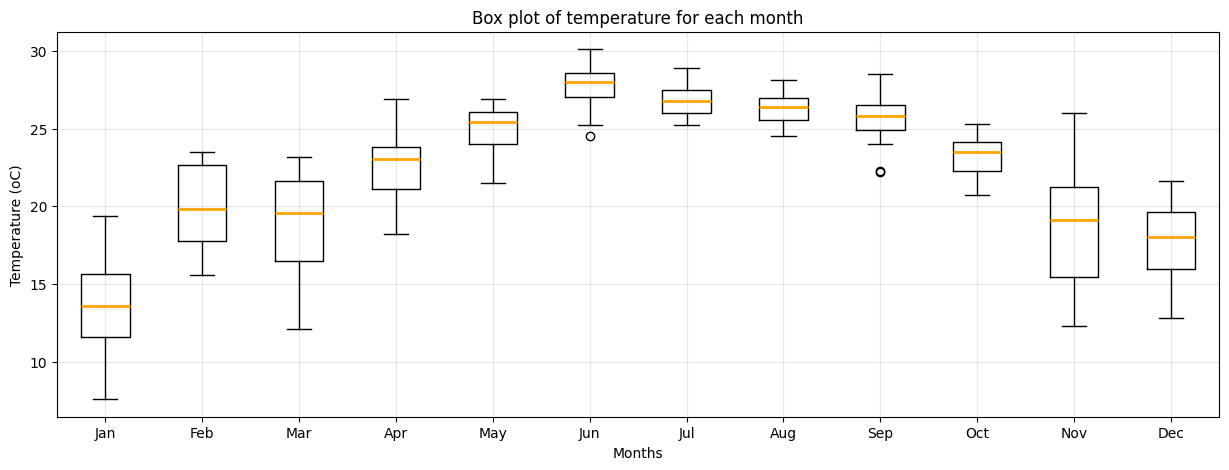

In [25]:
plt.figure(figsize=(15,5))
box = df1.plot(kind='box', figsize=(15,5), color='black', medianprops=dict(color='orange', linewidth=2))
# plt.hlines(y=np.mean(month_mean), xmin=1, xmax=12, color='blue', linestyle='--', linewidth=2)
# plt.text(6, np.mean(month_mean) + 1, f"Mean = {np.round(np.mean(month_mean),1)}", fontsize=12, color='blue')
plt.xticks(list(range(1,13)), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.title("Box plot of temperature for each month")
plt.ylabel("Temperature (oC)")
plt.xlabel("Months")
plt.grid(alpha=0.3,zorder=0)
plt.show()

#### Exercise 4

In [3]:
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")

NumPy version: 1.26.4
Pandas version: 2.2.3


In [5]:
import xarray as xr
from numpy import *
from netCDF4 import *
from datetime import *
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import BoundaryNorm
import geopandas as gpd
import matplotlib.patheffects as pe

In [6]:
random.seed(180793)

x_location = random.randint(10650, 10800, size = (2000)) / 100
y_location = random.randint(2060, 2170, size = (2000)) / 100

In [7]:
netcdf_file = '../../data_visualization_labwork/wrfout_d02_2019-11-12_sample.nc'
xr_data = xr.open_dataset(netcdf_file)
lon = xr_data.coords["XLONG"].values
lat = xr_data.coords["XLAT"].values
data = xr_data.data_vars["T2"].values

gadm_shapefile_path = '../../data_visualization_labwork/gadm41_VNM_0/gadm41_VNM_1.shp'
gadm_data = gpd.read_file(gadm_shapefile_path)
hanoi = gadm_data[gadm_data['NAME_1'] == 'Quảng Ninh']

In [30]:
from shapely.geometry import Point, Polygon, MultiPolygon
inside = []
for x, y in zip(x_location, y_location):
    p = Point(x,y)
    if hanoi.contains(p).any():
        inside.append(p)

<Figure size 2000x700 with 0 Axes>

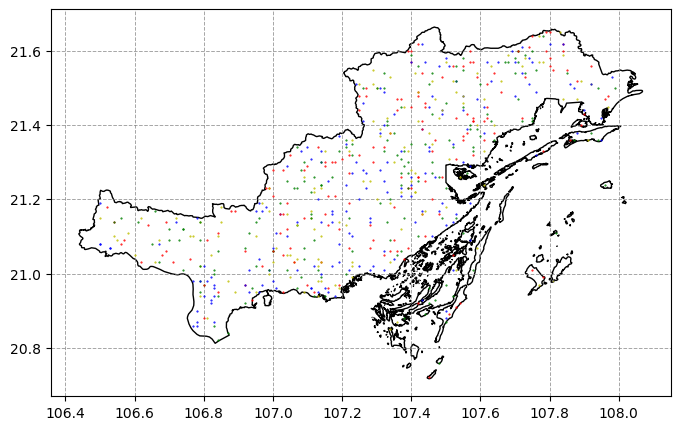

In [41]:
#now, create a map
fig = plt.figure(figsize=(20,7))

fig, ax = plt.subplots(figsize=(8, 6))

hanoi_boundary = hanoi.geometry.values[0]
hanoi.plot(ax = ax, color="none", edgecolor="black", figsize=(10, 8), legend=True)

c = ['go', 'bo', 'ro' , 'yo']

for p in inside:
    ax.plot(p.x, p.y,random.choice(c),markersize=0.5, label='Station inside Quang Ninh')

ax.grid(color='gray', linestyle='--', linewidth=0.7, alpha=0.7)
plt.show()

In [37]:
print(f"There are {len(inside)} stations inside Quang Ninh")

There are 630 stations inside Quang Ninh


#### Exercise 5


In [42]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.lines import Line2D
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as colors
from matplotlib.colors import BoundaryNorm

In [43]:
random.seed(seed=180793)
apple = random.randint(0, 30, size = (10,12))       #10 stores, 12 months
banana = random.randint(0, 60, size = (10,12))      #10 stores, 12 months
durian = random.randint(0, 80, size = (10,12))      #10 stores, 12 months

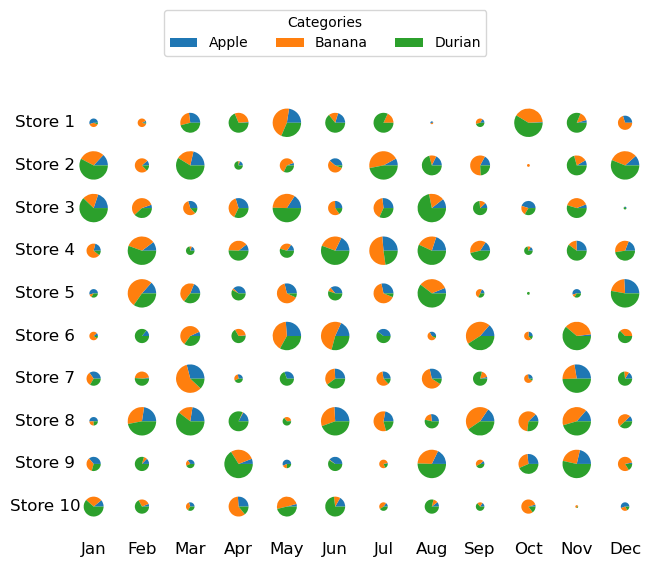

In [68]:
# Create a figure
fig = plt.figure(figsize=(8, 6))

gs = GridSpec(11, 13)
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov","Dec"]


# Step 2: Add a dedicated row for column indices
for col in range(1,13):  # Columns 1 to 11 (grid column indices)
    ax = fig.add_subplot(gs[-1, col])  # Top row
    ax.text(0.5, 0.5, f"{months[col-1]}", fontsize=12, ha='center', va='center')
    ax.axis('off')  # Hide axes

# Step 3: Add a dedicated column for row indices
for row in range(0, 10):  # Rows 1 to 3 (grid row indices)
    ax = fig.add_subplot(gs[row, 0])  # First column
    ax.text(0.5, 0.5, f"Store {row +1}", fontsize=12, ha='center', va='center')
    ax.axis('off')  # Hide axes

for storeRow in range(1,11):
    for monthCol in range(12):
        
        ax = fig.add_subplot(gs[storeRow-1 , monthCol+1])
        total_sale = sum([apple[storeRow-1, monthCol], banana[storeRow-1, monthCol], durian[storeRow-1, monthCol]])
        if total_sale < 40 : 
            radi = 0.1
        elif total_sale < 60 :
            radi = 0.3
        elif total_sale < 80:
            radi = 0.5
        elif total_sale < 100:
            radi = 0.7
        else: radi = 1
        ax.pie([apple[storeRow-1, monthCol], banana[storeRow-1, monthCol], durian[storeRow-1, monthCol]] , radius=radi)

        # fig.text(
        #     0.25 * (storeRow/10) + 0.1,  # X position based on column index
        #     0.33 * (12 - monthCol) - 0.05,  # Y position based on row index
        #     f"store{storeRow},{months[monthCol]}",  # Row and column labels
        #     fontsize=10,
        #     color="gray",
        #     ha="center"
        # )

# for i in range(1,10):
#     y = 1 - (i/11)
#     fig.add_artist(plt.Line2D([0.05, 0.95], [y,y], color='black', linewidth=1))

labels = ['Apple','Banana', 'Durian']
fig.legend(labels, loc='upper center', ncol=3, title="Categories", bbox_to_anchor=(0.5, 1.05))

#### Exercise 6


In [70]:
obs = pd.read_csv("obs.txt", header=None)
obs = obs.drop(obs.columns[0], axis=1)

simu1 = pd.read_csv("simu1.txt", header=None)
simu1 = simu1.drop(simu1.columns[0], axis=1)


simu2 = pd.read_csv("simu2.txt", header=None)
simu2 = simu2.drop(simu2.columns[0], axis=1)


simu3 = pd.read_csv("simu3.txt", header=None)
simu3 = simu3.drop(simu3.columns[0], axis=1)

for i in range(1,13):
    obs[i] = pd.to_numeric(obs[i], errors='coerce')
    obs[i] = obs[i].replace(-99.0, np.nan)

    simu1[i] = pd.to_numeric(simu1[i], errors='coerce')
    simu1[i] = simu1[i].replace(-99.0, np.nan)

    simu2[i] = pd.to_numeric(simu2[i], errors='coerce')
    simu2[i] = simu2[i].replace(-99.0, np.nan)

    simu3[i] = pd.to_numeric(simu3[i], errors='coerce')
    simu3[i] = simu3[i].replace(-99.0, np.nan)

KeyError: 0

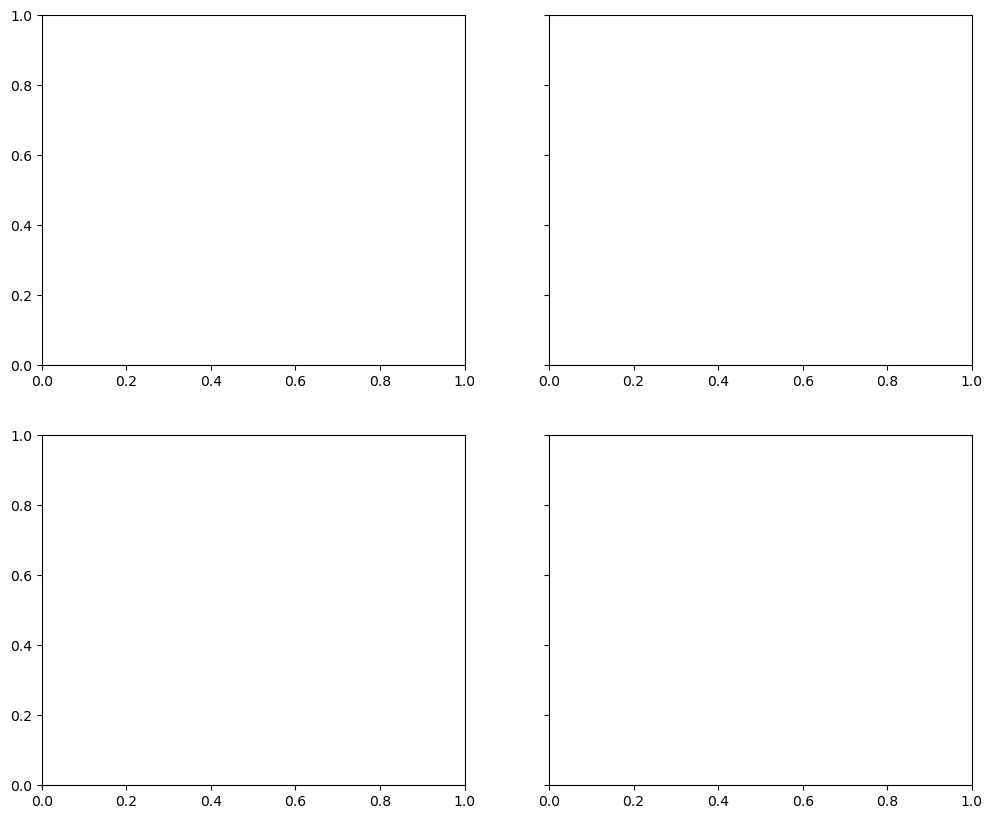

In [73]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate synthetic data
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
seasons = ["DJF", "MAM", "JJA", "SON"]
sources = ["OBS", "SIMU_1", "SIMU_2", "SIMU_3"]

# Generate random data for 4 sources over 12 months
np.random.seed(42)
data = {
    "OBS" : obs,
    "SIMU_1": simu1,
    "SIMU_2": simu2,
    "SIMU_3": simu3
}

# Step 2: Group months into seasons
season_months = {
    "DJF": [0, 1, 11],  # Dec, Jan, Feb
    "MAM": [2, 3, 4],   # Mar, Apr, May
    "JJA": [5, 6, 7],   # Jun, Jul, Aug
    "SON": [8, 9, 10]   # Sep, Oct, Nov
}

# Step 3: Create a 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharey=True)
axes = axes.flatten()

# Colors for bar plots
colors = ['orange', 'green', 'blue', 'red']

# Step 4: Plot data for each season
for i, (season, months_idx) in enumerate(season_months.items()):
    ax = axes[i]
    
    # Extract data for the current season
    for j, source in enumerate(sources[1:]):
        season_data = [data[source][m] for m in months_idx]
        
        # Plot bar data
        ax.bar(
            np.arange(len(months_idx)) + j * 0.2,  # Bar positions
            season_data,
            width=0.2,
            label=source if i == 0 else None,  # Add legend only in the first plot
            color=colors[j],
            alpha=0.7
        )
    
    # Plot line for "OBS" source
    obs_data = [data["OBS"][m] for m in months_idx]
    ax.plot(
        np.arange(len(months_idx)) + 0.3, 
        obs_data, 
        color='red', 
        label="OBS Line" if i == 0 else None, 
        marker='o'
    )
    
    # Customize subplot
    ax.set_title(season)
    ax.set_xticks(np.arange(len(months_idx)) + 0.3)
    ax.set_xticklabels([months[m] for m in months_idx])
    ax.set_xlabel("Rain amount (mm)")
    ax.set_ylabel("Frequency (%)")
    ax.grid(True, linestyle="--", alpha=0.5)

# Step 5: Add legend and adjust layout
fig.legend(sources, loc="upper center", ncol=4, title="Sources")
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to leave space for the legend
plt.show()
